## Generalised Cordic Algorithm

## Basics of CORDIC algorithm

CORDIC algorithms exploit the fact that on rotation of a vector ((0, 0)$\rightarrow$ (x, y)) by $\theta^o$ new co-ordinates of a vector are:

\begin{equation}
    x' = x\cos(\phi) - y\sin(\phi)
\end{equation}
\begin{equation}
    y' = x\sin(\phi) + y\cos(\phi)
\end{equation}

Using basic trignometric identies these equations can be shown to be equivalent to:

\begin{equation}
    x' = A\cdot(x - y\tan(\phi))
\end{equation}
\begin{equation}
    y' = A\cdot(x\tan(\phi) + y)
\end{equation}

\begin{equation}
A = \frac{1}{\sqrt{1+\tan^2(\phi)}}
\end{equation}
\begin{equation}...[Eq 1.1]
\end{equation}

These equations can be seperated into two parts, A which scales the magnitude of vector and rest of the part which performs vector rotation. If we get rid of A these set of equations will perform psuedo rotations.

If instead of single $-\theta^\circ$ rotation vector are rotated through multiple angles which sums to $-\theta^\circ$. 

In current form these equations require multipliers but if we restrict each of the iteration to an angle such that $\tan{(\phi_i)} = 2^{-i}$. In iterative form equations now are:

\begin{equation}
    x_{i+1} = x_{i} - y_{i} \cdot d_{i} \cdot 2^{-i}      
\end{equation}


\begin{equation}
    y_{i+1} = y_{i} + x_{i} \cdot d_{i} \cdot 2^{-i}
\end{equation}

\begin{equation}
    z_{i+1} = Z_{i} - d_{i} \cdot tan^{-1}(2^{-i})     
\end{equation}


One thing that is worth noticing is for increase in value of i, decrease in value of $tan^{-1}(2^{-i})$ is less than half of $tan^{-1}(2^{-(i-1)})$. Or mathematically:

\begin{equation}
tan^{-1}(2^{-(i)}) \geq \frac{1}{2} tan^{-1}(2^{-(i+1)})
\end{equation}

This is very important for convergence of value in either of the mode, if value of does not convergence in specific case we'll have to repeat certain iterations to get convergence.

# Modes of CORDIC Algorithms
CORDIC algorithms is usualy operated in one of the following two modes:
* **Rotation mode** 
* **Vector mode**


## Rotation Mode
Instead of performing rotation by an angle in one go, multiple small rotations are performed over number of iterations. After each iteration total sum of rotation is equal to the desired angle. 
In rotation mode vector is initialised with given angle, on each further iteration the value of angle is reduced by rotating the vector by fixed amount.

**Equations** used in **rotation mode** are:

\begin{equation}
    x_{i+1} = x_{i} - y_{i} \cdot d_{i} \cdot 2^{-i}      
\end{equation}

\begin{equation}
    y_{i+1} = y_{i} + x_{i} \cdot d_{i} \cdot 2^{-i}
\end{equation}

\begin{equation}
    z_{i+1} = Z_{i} - d_{i} \cdot tan^{-1}(2^{-i})     
\end{equation}

\begin{equation}
^{(for \space i^{th} \space iteration)}
\end{equation}

here **Z** is also known as **angle accumulator** since at the end of iterations **Z accumulates all the rotations performed**

Value of $d_{i}$ is chosen such that z reduces at each iteration. Thus after **n iterations if z = 0 then**

\begin{equation}
    x_{n} = A_{n} \cdot [ x_{0} \cdot cos z_{0} - y_{0} \cdot sin z_{0} ]      
\end{equation}

\begin{equation}
    y_{n} = A_{n} \cdot [ y_{0} \cdot cos z_{0} + x_{0} \cdot sin z_{0} ]      
\end{equation}

\begin{equation}
    z_{n} = 0
\end{equation}

where 

\begin{equation}
    A_{n} = {\displaystyle \prod_{i=0} ^{n}} \sqrt{1+2^{-2i}}
\end{equation}

Equations used above are for circular coordinate system(i.e **m = 1**)

The **rotational mode CORDIC** operation can simultaneously **compute the sine and cosine of the input angle**

Setting the **y component** of the **input vector to zero** reduces the rotation mode result to:


\begin{equation}
    x_{n} = A_{n} \cdot x_{0}cos z_{0}
\end{equation}

\begin{equation}
 y_{n} = A_{n} \cdot x_{0}sin z_{0}
\end{equation}



By setting **$x_{0}$ = 1/$A_{n}$** and **$y_{0}$ = 0**, the rotation produces the unscaled sine and cosine of the angle argument, **$z_{0}$**,

where **1/$A_{n}$ = 0.6073** which produces **$x_{out}$ = cos$z_{0}$, $y_{out}$ = sin$z_{0}$ and $z_{out}$ = 0**

**Table below** shows the parameter tuning to calculate **trigonometric(sine, and cos)** and **hyperbolic trigonometric(sinh, cosh)** function

\begin{array}{|l|l|l|l|l|l|l|}
\hline 
Coordinate~System & x_{in} & y_{in} & z_{in} & x_{out}    & y_{out}    & z_{out} \\ \hline
Linear            & x      & 0      & z      & x          & x*z        & 0       \\ \hline
Circular          & 0.6073 & 0      & z      & \cos{(z)}  & \sin{(z)}   & 0       \\ \hline
Hyperbolic        & 1.2075 & 0      & z      & \cosh{(z)} & \sinh{(z)} & 0       \\ \hline
\end{array}

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import math
import string
import struct

from __future__ import division

In [2]:
circular = 1
linear = 0
hyperbolic = -1

In [3]:
# methods to plot values

def plot(x_values, y_values, x_label, y_label, plot_label):
    # Plot of Value of gain with number of iterations
    fig = plt.figure();
    ax = fig.add_subplot(111);

    line, = ax.plot(x_values, y_values,  lw=2)

    ax.set_title(plot_label)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.show()
    plt.close()
    return

### Value of $A_{n}$ as $n \rightarrow \infty$ for circular co-ordinates

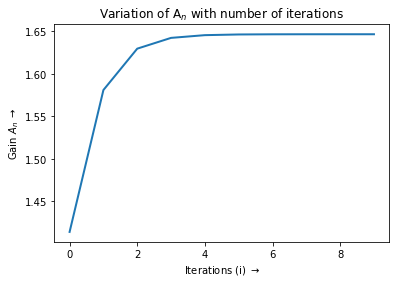

Gain of the system is 1.6467592111398222
Inverse gain value 1/ A$_{n}$ is:  0.6072533210898752


[1.4142135623730951,
 1.5811388300841898,
 1.6298006013006623,
 1.6424840657522373,
 1.645688915757255,
 1.6464922787124787,
 1.6466932542736437,
 1.646743506596901,
 1.6467560702048785,
 1.6467592111398222]

In [4]:
#Calculation of system gain ($A_n$) for circular co-ordinate system,
#these calculation can be extended to other co-ordinate system with slight modification.

gain_val_list = [math.sqrt(2)]  # Stores value of gain after each iteration  for i =0,  $A_{0}$ = underroot(1+2^0) == underroot(2)
max_iter_gain = 10              # Max number of iterations for calculating value of gain
iterations_list = [0]           # List that Stores the number of iterations performed

for i in range (1, max_iter_gain):
    gain_val_list.append(gain_val_list[i-1] * math.sqrt(1 + 2**(-2 * i)))
    iterations_list.append(i)

# Plot for value of gain with each iteration
plot(iterations_list, gain_val_list, 'Iterations (i) $\\rightarrow$', 'Gain $A_{n}$ $\\rightarrow$',
     'Variation of A$_{n}$ with number of iterations')
print("Gain of the system is " + str(gain_val_list[len(gain_val_list) - 1]))

inverse_gain = 1/ gain_val_list[len(gain_val_list)-1]
print('Inverse gain value 1/ A$_{n}$ is: ' ,inverse_gain)

#iterations_list
gain_val_list

In [5]:
#`ROM_lookup` provides values of constant required for each coordinate system based on iteration count
def ROM_lookup(iteration, coordinate):
    if (coordinate == circular):
        return math.degrees(math.atan(2**(-1*iteration)))
    elif (coordinate == linear):
        return 2**(-1*iteration)
    elif (coordinate == hyperbolic):
        return (math.atanh(2**(-1*iteration)))

## Python implementation of Rotation mode

In [6]:
#`Rotation_mode` returns dictionary of list containing x, y and z values for each iteration

def rotation_mode(x, y, z, coordinate, iterations):
    a = 0.607252935;   # = 1/K
    
    x_val_list = []
    y_val_list = []
    z_val_list = []
    iterations_list = []

    i = 0;                  # Keeps count on number of iterations
    
    current_x = x         # Value of X on ith iteration 
    current_y = y         # Value of Y on ith iteration
    current_z = z         # Value of Z on ith iteration
    
    di = 0
    
    if (coordinate == hyperbolic):
        i = 1
    else:
        i = 0
        
    flag = 0
    
    if (iterations > 0):
        while (i < iterations):
            if (current_z < 0):
                di = -1
            else:
                di = +1
            next_z = current_z - di * ROM_lookup(i, coordinate)
            next_x = current_x - coordinate * di * current_y * (2**(-1*i))
            next_y = current_y + di * current_x * 2**(-1*i)
            
            current_x = next_x
            current_y = next_y
            current_z = next_z

            x_val_list.append(current_x)
            y_val_list.append(current_y)
            z_val_list.append(current_z)
            
            iterations_list.append(i)
            
            if (coordinate == hyperbolic):
                if ((i != 4) & (i != 13) & (i!=40)):
                    i = i+1
                elif (flag == 0):
                    flag = 1
                elif (flag == 1):
                    flag = 0
                    i = i+1
            else:
                i = i+1
    return { 'x':x_val_list, 'y':y_val_list, 'z':z_val_list, 'iteration':iterations_list, }

# Python implementation of vector mode
In vector mode vector is initialised with given angle, on each further iteration the value of angle is reduced by rotating the vector by fixed amount.

Equations used in vector mode are (same as rotation mode):


\begin{equation}
    x_{i+1} = x_{i} - y_{i} \cdot d_{i} \cdot 2^{-i}      
\end{equation}


\begin{equation}
    y_{i+1} = y_{i} + x_{i} \cdot d_{i} \cdot 2^{-i}
\end{equation}

\begin{equation}
    z_{i+1} = Z_{i} - d_{i} \cdot tan^{-1}(2^{-i})     
\end{equation}


\begin{equation}
^{(for \space i^{th} \space iteration)}
\end{equation}

Value of $d_{i}$ is chosen such that z reduces at each iteration. Thus after n iterations if z = 0 then


\begin{equation}
    x_{n} = A_{n} \sqrt{ x_{0}^{2} - y_{0}^{2} }
\end{equation}

\begin{equation}
    y_{n} = 0
\end{equation}

\begin{equation}
    z_{n} = z_{0} + tanh^{-1}( \dfrac{y_{0}}{x_{0}} )
\end{equation}

where 

\begin{equation}
    A_{n} = {\displaystyle \prod_{i=0} ^{n}} \sqrt{1+2^{-2i}}
\end{equation}

In [7]:
def vector_mode(x, y, z, coordinate, iterations):
    a = 1.2075;   # = 1/K
    
    x_val_list = []
    y_val_list = []
    z_val_list = []
    iterations_list = []

    i = 0;                  # Keeps count on number of iterations
    
    current_x = x         # Value of X on ith iteration 
    current_y = y         # Value of Y on ith iteration
    current_z = z         # Value of Z on ith iteration
    
    di = 0
    
    # This is neccesary since result for i=0 doesn't exists for hyperbolic 
    # co-ordinate system.
    if (coordinate == hyperbolic):
        i = 1
    else:
        i = 0
        
    flag = 0
    
    if (iterations > 0):
        while (i < iterations):
            di = -1*math.copysign(1, current_y);#*current_x);
            next_x = current_x - coordinate * di * current_y * (2**(-1*i))
            next_y = current_y + di * current_x * 2**(-1*i)
            next_z = current_z - di * ROM_lookup(i, coordinate)
            
            current_x = next_x
            current_y = next_y
            current_z = next_z

            x_val_list.append(current_x)
            y_val_list.append(current_y)
            z_val_list.append(current_z)
            
            iterations_list.append(i)
            
            if (coordinate == hyperbolic):
                if ((i != 4) & (i != 13) & (i!=40)):
                    i = i+1
                elif (flag == 0):
                    flag = 1
                elif (flag == 1):
                    flag = 0
                    i = i+1
            else:
                i = i+1
    return { 'x':x_val_list, 'y':y_val_list, 'z':z_val_list, 'iteration':iterations_list }

> **NOTE:** Method used here to calculate decision vector ($d_i$) is based on modified technique of what was mentioned originally in *Andraka, Ray (1998)* paper on CORDIC algorithms[1]. Here $d_i~=~x_i \cdot y_i$ instead of $d_i~=~y_i$. This allows greater range values and allows convergence of algorithm in case of $x_{o} < y_{o}$.

## Calculating trignometric function(sine and cos) using cordic in Rotation mode providing 
$y_{in}$ = 0, $x_{in}$ = 1/$A_{n}$ and m = 1(i.e circular mode)
where $x_{out}$ = cos$z_{0}$, $y_{out}$ = sin$z_{0}$

In [8]:
#sine and cos calculation

x0 = 0.6073   # needs to be fixed at x=0.6073 or x= 1/An
y0 = 0        # needs to be kept 0 to simplify the rotation mode equations in terms of sin and cos
z0 = 60       # can take any value of angle between -pi/2 to pi/2
cordinate = circular #needs to operate in circular mode in order to calculate trigonometric functions
iteration1 = 10       # are variable can alter but its best to minimize iteration to save resources(H/W and S/W both)

sin_values = []
cos_values = []
z_out_values = []

trig_function = rotation_mode(x0, y0, z0, cordinate, iteration1)

cos_value = trig_function['x']
cos_values.append(cos_value[len(cos_value)-1])

sin_value = trig_function['y']
sin_values.append(sin_value[len(sin_value)-1])

z_out_value = trig_function['z']
z_out_values.append(z_out_value[len(z_out_value)-1])

cos_values, sin_values, z_out_values

([0.4989670002569571], [0.8667096840429519], [-0.0708547915951548])

In [31]:
def validate_rotation_mode_trig_values(angle, iteration):
    x = 0.6073
    y =0
    z = angle
    coordinate = circular
    sin_values =[]
    cos_values =[]
    iteration_list = []
    angle_list = []
    cordinate_sys = []
    
    for angle in range(0,90):
        dict_trig = rotation_mode(x,y,angle,coordinate,iteration)
        
        cos_value = dict_trig['x']
        cos_values.append(cos_value[len(cos_value)-1])
        
        sin_value = dict_trig['y']
        sin_values.append(sin_value[len(sin_value)-1])
        
        iteration_list.append(iteration)
        angle_list.append(angle)
    
    return {'Sine':sin_values, 'Cosine':cos_values, 'Angles':angle_list, 'iteration':iteration_list}

d1 = validate_rotation_mode_trig_values(10, 10)

d1

{'Sine': [0.0011726801878624927,
  0.016780620170849615,
  0.03630585677343483,
  0.05191446823957053,
  0.07140939088137052,
  0.08588596603220448,
  0.10532861521530447,
  0.12085221022020541,
  0.14019996407341787,
  0.1556537947992543,
  0.17491540134945388,
  0.19027844823062845,
  0.20928073707311895,
  0.22453448110685736,
  0.2435223654575312,
  0.2586475675685905,
  0.2774481761885753,
  0.29242439212322363,
  0.3073310520260994,
  0.3251452218273268,
  0.3435512761887887,
  0.3581836921063393,
  0.3763350044935029,
  0.3907657878720712,
  0.40509943159246015,
  0.42287924198015175,
  0.4368623185676461,
  0.4543481744106704,
  0.46821065678535895,
  0.48536458261182375,
  0.4989670002569571,
  0.5157967696357509,
  0.5291205038538507,
  0.5446674419339955,
  0.5577055299244095,
  0.573809807788904,
  0.58653714900119,
  0.602230754332489,
  0.6146302652084646,
  0.6299202599306714,
  0.6418729918396465,
  0.6567280844887533,
  0.6684306187174888,
  0.6828308343520083,
  0.694

In [50]:
import pandas as pd
Trig_value_data = pd.DataFrame(d1)
Trig_value_data.set_index('Angles')
Trig_value_data


,Sine,Cosine,Angles,iteration
0,0.001173,1.000076,0,10
1,0.016781,0.999936,1,10
2,0.036306,0.999418,2,10
3,0.051914,0.998729,3,10
4,0.071409,0.997524,4,10
...,...,...,...,...
85,0.996382,0.085886,85,10
86,0.997524,0.071409,86,10
87,0.998729,0.051914,87,10
88,0.999418,0.036306,88,10


## Calculating Inverse trignometric function(Arctangent, Arcsine and Arccosine) using cordic.

### Arctangent
The arctangent, **$\theta$= Atan(y/x)**, is directly computed using the **vectoring mode** CORDIC- rotator if the **angle accumulator is initialized with zero**.


$z_{in}$ = 0, $x_{in}$ = denominator ratio of angle, $y_{in}$ = numerator  of the ratio, and m = 1(i.e circular mode)
where $x_{out}$ = cos$z_{0}$, $y_{out}$ = sin$z_{0}$

The argument must be provided as a ratio expressed as a vector (x, y).

x0 = 1
y0 = 1
z0 = 0

In [44]:
# Arctangent calculation

x0 = 1   # # can take any value or can be fixed to 1 as y/x if x = 1fixed then input can be feed directly through y.
y0 = 0.577        # can take any value.
z0 = 0       # needs to feed as zero.
cordinate = circular #needs to operate in circular mode in order to calculate trigonometric functions
iteration1 = 10       # are variable can alter but its best to minimize iteration to save resources(H/W and S/W both)

arctan_values = []
z_out_values = []

if x0 == 0:
    print("infinity")
else:
    Arctan_function = vector_mode(x0, y0, z0, cordinate, iteration1)
    
Arctan_function

#z_out = Arctan_function['z']
#z_out
#z_out[len(z_out)-1]

{'x': [1.577,
  1.7885,
  1.879875,
  1.890078125,
  1.8996630859375,
  1.9007640075683594,
  1.9011411166191101,
  1.9011845889501273,
  1.9012208710071719,
  1.9012245071483882],
 'y': [-0.42300000000000004,
  0.36549999999999994,
  -0.08162500000000006,
  0.15335937499999994,
  0.03522949218749993,
  -0.024134979248046945,
  0.005564458370208671,
  -0.009288206603378127,
  -0.0018617043027916924,
  0.0018516177108941901],
 'z': [45.0,
  18.43494882292201,
  32.47119229084849,
  25.346175941946694,
  28.922510316944045,
  30.712420925190116,
  29.81724721497904,
  30.264861385839595,
  30.041050885471055,
  29.929145208404847],
 'iteration': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}

In [47]:
import random
def validate_vector_mode_ArcTangent_values(start_value, end_value, iteration):
    
    ratio_value_decimal = 1 # to set theta = 45 and x = 1, y=1 so y/x =1 arctan(1) = 45
    
    x0 = 1
    y0 = ratio_value_decimal 
    z0 = 0
    coordinate_sys = circular
    
    z_out_angle_values = []
    iteration_list = []
    input_y_values_list = []
    
    for value in range(0,90):
        val = round(random.uniform(start_value,end_value),3)
        dict_Arctan = vector_mode(x0,val,z0,coordinate_sys,iteration)
        
        z_out_value = dict_Arctan['z']
        z_out_angle_values.append(z_out_value[len(z_out_value)-1])
        
        input_y_value = val
        input_y_values_list.append(val)
        
        iteration_list.append(iteration)
        
        #add for x and y output values if needed in future
    
    return {'Z_out':z_out_angle_values, 'Test_Angles':input_y_values_list, 'iteration':iteration_list}

d2 = validate_vector_mode_ArcTangent_values(5, 49, 10)

d2

{'Z_out': [83.95436664126187,
  87.47190937257862,
  88.8147587150368,
  79.47942634606868,
  87.02441129461467,
  88.59094906843212,
  85.68156195215649,
  82.38783057497214,
  84.84959498298296,
  88.8147587150368,
  85.29721598372005,
  82.38783057497214,
  88.8147587150368,
  88.14334172744812,
  88.14334172744812,
  88.8147587150368,
  79.25563035921708,
  88.8147587150368,
  86.80060164800999,
  88.8147587150368,
  87.24822264874707,
  88.59094906843212,
  87.69572072671103,
  83.28305891669324,
  86.57679029387758,
  86.35299430702598,
  88.36713771429972,
  80.82216642550681,
  88.36713771429972,
  88.36713771429972,
  86.35299430702598,
  88.59094906843212,
  88.59094906843212,
  88.59094906843212,
  88.36713771429972,
  78.80800935847999,
  88.8147587150368,
  87.69572072671103,
  87.69572072671103,
  88.59094906843212,
  79.70323770020109,
  86.12918295289357,
  87.69572072671103,
  87.91953037331571,
  87.69572072671103,
  88.8147587150368,
  88.14334172744812,
  78.8080093

In [49]:
Arctan_value_dataSet = pd.DataFrame(d2)
Arctan_value_dataSet

,Z_out,Test_Angles,iteration
0,83.954367,9.518,10
1,87.471909,23.487,10
2,88.814759,44.891,10
3,79.479426,5.359,10
4,87.024411,19.719,10
...,...,...,...
85,88.367138,32.855,10
86,87.024411,18.980,10
87,88.367138,36.131,10
88,88.590949,43.096,10


## Validate function to collect the generated output data verification